# Assessed Problems 7



***
## Q1) Numerical Differentiation [1 mark]


Plot $y(x)=\tan(x)xe^{x}$ and the derivative which you will calculate numerically with x$\epsilon [-1,1]$.

$$ \dfrac{\mathrm{d}f}{\mathrm{d}x} = \lim_{\delta x \to 0} \dfrac{f(x+\delta x)-f(x)}{\delta x} $$




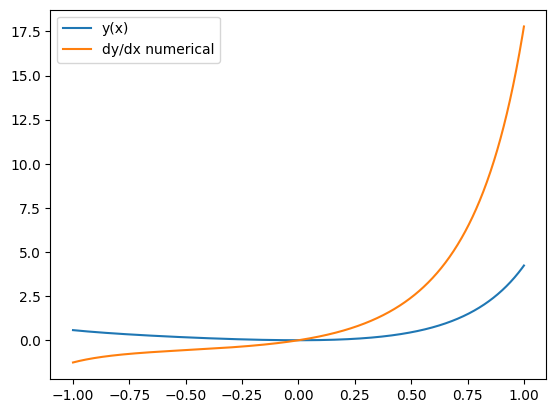

In [188]:
import numpy as np;
import matplotlib.pyplot as mpl;

# The function f as shown above
def f(x):
    return np.tan(x) * x * np.exp(x);

# Defining the axis
x = np.linspace(-1, 1, 1000);
y = f(x);

# Defining the derivative
h = 1e-8;
dydx = (f(x + h) - f(x)) / h;

# Plotting the graph
mpl.plot(x, y, label = 'y(x)');
mpl.plot(x, dydx, label = 'dy/dx numerical');
mpl.legend();
mpl.show();

***
## Q2) Gradient Descent


Using gradient descent, find the global minimum of the following function within the range $x=[-1,4]$, $y=[-3,3]$. 

$$f(x,y) = \sin(x + y) + (x - y)^2 - 1.5 x + 2.5 y + 1$$

You may need to run gradient descent multiple times using **random starting positions** to find the global minimum.

Your code should output the coordinates and value of the global minimum along with a suitable plot of the function showing the path the minimisation route took.

* [1 mark] Writing functions for f(x,y) and gradf(x,y)
* [1 mark] Implementing gradient descent
* [1 mark] Plotting paths and contour plot of f(x,y)
* [1 mark] Writing a gradient descent **function** and calling it multiple times with random starting positions
* [1 mark] Identifying the best global minimum and adding a plt.scatter to show it

Differentiating f

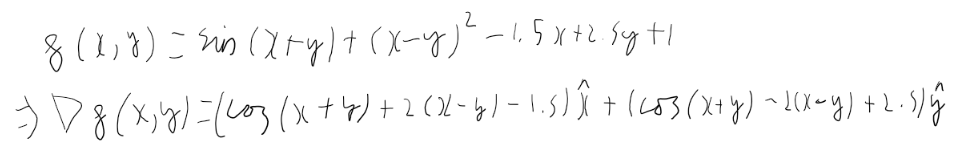

The approximated minimum is at x = -0.5471975511965975, y = -1.5471975511965974, with a z = -1.9132229549810367
The approximated minimum is at x = -0.5471975511965975, y = -1.5471975511965974, with a z = -1.9132229549810367
The approximated minimum is at x = 2.594395102393195, y = 1.5943951023931948, with a z = 1.2283696986087569
The approximated minimum is at x = -0.5471975511965975, y = -1.5471975511965974, with a z = -1.9132229549810367
The approximated minimum is at x = -0.5471975511965975, y = -1.5471975511965974, with a z = -1.9132229549810367
The approximated minimum is at x = 2.594395102393195, y = 1.5943951023931948, with a z = 1.2283696986087569
The approximated minimum is at x = -0.5471975511965975, y = -1.5471975511965974, with a z = -1.9132229549810367
The approximated minimum is at x = -0.5471975511965981, y = -1.547197551196598, with a z = -1.9132229549810367
The approximated minimum is at x = -0.5471975511965975, y = -1.5471975511965974, with a z = -1.9132229549810367
T

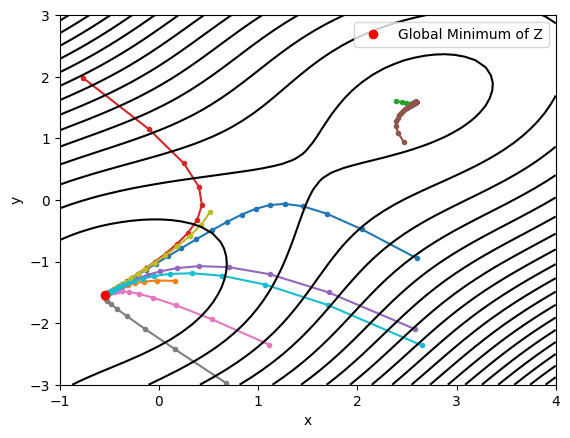

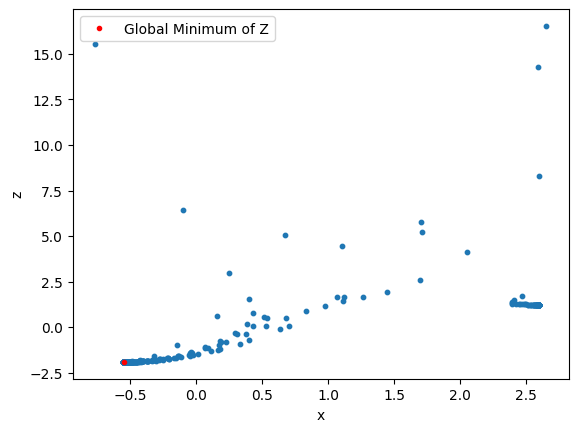

In [204]:
import numpy as np;
import matplotlib.pyplot as mpl;
import time;

# Defining the function f as shown above
def f(x,y):
    return np.sin(x + y) + np.power(x - y, 2) - 1.5*x + 2.5*y + 1;

N = 50;
Z = np.zeros((N,N));

# Defining points for both axis
X = np.linspace(-1, 4, N);
Y = np.linspace(-3, 3, N);

# Creating a 2D space out of X and Y
XX, YY = np.meshgrid(X, Y);

# Defining the output of f
Z = f(XX,YY);

# Creating the random number generator for the random start location
seed = time.time_ns();
rng = np.random.default_rng(seed);

# The gradient function for f
def gradf(x,y):
    return np.array([
        np.cos(x + y) + 2 * (x - y) - 1.5,
        np.cos(x + y) - 2 * (x - y) + 2.5
    ]);

# The gradient decent method implemented as a callable function
def GradientDecent(startingX, startingY, gradf, maxIterations = 10000):
    # Starting x and y are defined randomly
    xn = startingX;
    yn = startingY;

    # Created to store every iteration of xn so a path can be drawn on the contour plot
    xPoints = [];
    yPoints = [];

    # Defining a constant used for the gradient decent
    Lambda = 0.1;

    for i in range(0, maxIterations):
        
        # Storing the current points for plotting
        xPoints.append(xn);
        yPoints.append(yn);

        # Defining the next x and y in the iteration
        xnPlus1 = xn - Lambda*gradf(xn, yn)[0];
        ynPlus1 = yn - Lambda*gradf(xn, yn)[1];
        
        # Setting the current x and y to the next x and y
        xn = xnPlus1;
        yn = ynPlus1;

    return xPoints, yPoints;

# Defining how many start locations the gradient decent shall be called from
numberOfStartLocations = 10;

# Defining a list to contain all points, as well as all final approximations
allPoints = [];
finalApproximations = [];

# Finding various paths from various start locations
for i in range(0, numberOfStartLocations):
    # Calling the gradient decent function with a randomised start location
    xPoints, yPoints = GradientDecent(rng.uniform(-1,4), rng.uniform(-3,3), gradf);

    print(f"The approximated minimum is at x = {xPoints[-1]}, y = {yPoints[-1]}, with a z = {f(xPoints[-1], yPoints[-1])}");
    allPoints.append((xPoints, yPoints));
    finalApproximations.append((xPoints[-1], yPoints[-1]));

    # Draw path
    mpl.plot(xPoints, yPoints, marker=".");

# Calculating and stating the global minimum
finalApproximations = np.array(finalApproximations);
finalZs = f(finalApproximations[:,0], finalApproximations[:,1]);
print(f"The global minimum for this function is approximately z = {min(finalZs)}")

# Marking the global minimum onto the graph
mpl.plot(finalApproximations[:,0][np.where(finalZs == min(finalZs))][0], finalApproximations[:,1][np.where(finalZs == min(finalZs))][0], "ro", label = "Global Minimum of Z");

# Plot graph
mpl.contour(XX, YY, Z, colors = "black", levels = 20);
mpl.xlabel("x");
mpl.ylabel("y");
mpl.legend();
mpl.show();

# Plot scatter graph of all values z with respect to x, to show the global minimum
allPoints = np.array(allPoints);
mpl.scatter(allPoints[:,0], f(allPoints[:,0], allPoints[:,1]), s = 10);

# Plot a distinct colour for the minimum of z
mpl.plot(finalApproximations[:,0][np.where(finalZs == min(finalZs))][0], min(finalZs), "r.", label = "Global Minimum of Z");

# Add axis labels and show the graph
mpl.xlabel("x");
mpl.ylabel("z");
mpl.legend();
mpl.show();